<a href="https://colab.research.google.com/github/Laveluca/Bai-tap-AI/blob/main/Nh%E1%BA%ADn%20di%E1%BB%87n%20%C4%91%E1%BB%93_%C4%83n%20(%20Trung)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!jupyter nbconvert --to html /content/nhan-dien-do-an.ipynb


In [28]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [29]:
import os
train_image_files_path ='/content/drive/MyDrive/Trung III/Colab/Food/Train'

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)


In [31]:
label = ['Bánh cuốn','Bánh mì','Bánh pía','Bánh tét','Bánh xèo','Bún đậu mắm tôm','Cá kho tộ','Cơm tấm','Nem','Phở']

In [32]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')

Found 3008 images belonging to 10 classes.


In [33]:
x_train,y_train=next(train_generator)


In [34]:
x_train.shape


(32, 200, 200, 3)

In [35]:
y_train.shape


(32, 10)

In [36]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [37]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               61440512  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 61,445,642
Trainable params: 61,445,642
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [39]:
model.fit(x_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3030 - accuracy: 0.0625
Epoch 2/100
1/1 [==============================] - 1s 604ms/step - loss: 2.6381 - accuracy: 0.2188
Epoch 3/100
1/1 [==============================] - 1s 578ms/step - loss: 3.0853 - accuracy: 0.1250
Epoch 4/100
1/1 [==============================] - 1s 602ms/step - loss: 2.3915 - accuracy: 0.1562
Epoch 5/100
1/1 [==============================] - 1s 571ms/step - loss: 2.0566 - accuracy: 0.1562
Epoch 6/100
1/1 [==============================] - 1s 565ms/step - loss: 1.8784 - accuracy: 0.3750
Epoch 7/100
1/1 [==============================] - 1s 620ms/step - loss: 1.7580 - accuracy: 0.4688
Epoch 8/100
1/1 [==============================] - 1s 846ms/step - loss: 1.6650 - accuracy: 0.3750
Epoch 9/100
1/1 [==============================] - 1s 886ms/step - loss: 1.6300 - accuracy: 0.4688
Epoch 10/100
1/1 [==============================] - 1s 863ms/step - loss: 1.5323 - accuracy: 0.4688
Epoch 11/100

1/1 [==============================] - 0s 54ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 49ms/step
Đây là: Bánh mì


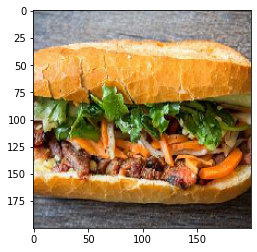

In [42]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Trung III/Colab/Food/Train/Banh mi/1.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])
